<a href="https://colab.research.google.com/github/Britt2405/DIDA-325-Midterm/blob/main/Brittany_Goldberg__Midterm_Project_325_Spring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Load Stuff

Using the code below we are going to import multiple libraries. Pandas allows us to easily analyze data. Seaborn and Matplotlib allows us to create data visualizations. Geopandas allows us to use geometric data to create maps that can be used as data visualizations.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

We are going to use this data file [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) for our analysis. We are going to use the pandas library we imported to read the file, check the column names, and the number of data points in each column.

In [ ]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

In [ ]:
voters.columns

Index(['Jurisdiction', 'Year', 'Month', 'New registered voters'], dtype='object')

In [ ]:
voters.count()

,0
Jurisdiction,106
Year,106
Month,106
New registered voters,106


##Introduction





The purpose of our project as researchers working with a government orgization is to analyze the data we are given about voter registation in 2016 and 2020. Our question about nation wide trends is: Did nation wide voter registration increase between 2016 and 2020? The goal of this research is to see if more or less people registered to vote. Our question about state trends is: Did more people register to vote in Virgina during Jan/Feb or Apr/May? The goal of this research is to see if season or proximity to an election impacts the number of voters who register in Virginia. These questions are important as they could impact when and where campaign ads are ran. This notebook is important to read because it analyzes the data in a clear way and provides data visualizations that can help the reader understand the data provided.

Our research questions are

* Question 1: Did nation wide voter registration increase between 2016 and 2020?
* Question 2: Did more people register to vote in Virgina during Jan/Feb or Apr/May?



## 1. Data Processing

These are the first five rows of the data and the column names are across the top. Jurisdication is categorical and tells us what state the new voters are registered in. Year is the year the voters registered. Moth is the month the voters registered. New registered voters is the number of people who registered.

In [ ]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


To clean up our data we are going to check for any missing or null values in our data set.

In [ ]:
voters.isna().values.any()

False

We are going to check the data types that each file contains so we know for data analysis.

In [ ]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


We are going to rename the Jurisdiction column to NAME and the New Registered Voters column to registered_voters to make it easier to type as we continue to use and analyze our data.

In [ ]:
voters = voters.rename(columns  = {"Jurisdiction":"NAME"})

In [ ]:
voters = voters.rename(columns  = {"New registered voters":"registered_voters"})

In [ ]:
voters.columns

Index(['NAME', 'Year', 'Month', 'registered_voters'], dtype='object')

Some potential limitations of this data is that it only contains data from two elections years, only contain data from 5 of the 12 months of the year, and only includes a limited number of states/districts.

###Exploratory Data Analysis

We are going to check for the maximum number of registered voters and check which state it was in, which year it was in, and which month it was in.



In [ ]:
voters.registered_voters.max()

238281

In [ ]:
voters.loc[voters.registered_voters == 238281]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


To be able to better understand the spread of our data we are going to find the average number of newly regesitered voters overall.

In [ ]:
voters["registered_voters"].mean()

48223.46226415094

We are going to create a seperate data frame of only the states whose number of new registrations exceeds the average. We are also going to check how many times the states exceeded the average number of voter registered.

In [ ]:
high_voters = voters.loc[voters.registered_voters > 48223.46226415094]

In [ ]:
high_voters.count()

,0
NAME,36
Year,36
Month,36
registered_voters,36


In [ ]:
high_voters.NAME.value_counts()

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


We are now going to find which state has the highest average number of registered voters. The three states with the highest averages are California, Texas, and Florida. These are three states with high populations.

In [ ]:
voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending= False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


##Data Visualization

This bar graph shows the total number of newly registered voters, shown in millions, for each state. This graph shows that the three states with the highest averages are California (Orange), Texas (Teal) and Florida (Yellow).

In [ ]:
total_voters = voters.groupby("NAME")["registered_voters"].sum()

In [ ]:
total_voters.head(12)

,registered_voters
NAME,
Arizona,282492
California,1156363
Colorado,164220
Delaware,25331
District of Columbia,32484
Florida,526945
Georgia,292833
Illinois,454723
Maryland,221335


<ipython-input-53-ded4d57e97ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(total_voters, palette = "Spectral")


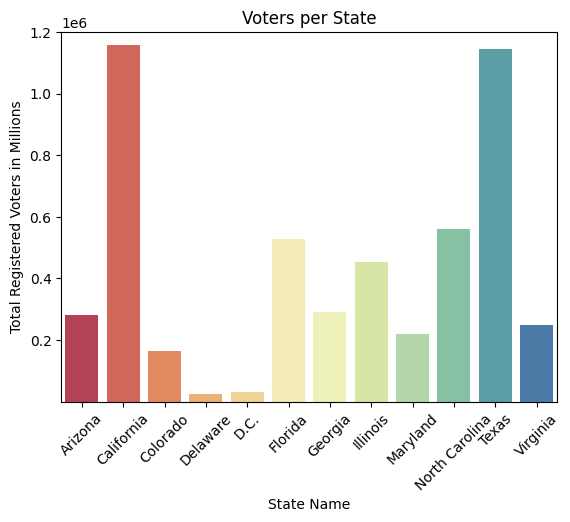

<Figure size 1000x1000 with 0 Axes>

In [ ]:
labels = ["Arizona", "California", "Colorado", "Delaware", "D.C.", "Florida", "Georgia", "Illinois", "Maryland", "North Carolina", "Texas", "Virginia"]

sns.barplot(total_voters, palette = "Spectral")
plt.xlabel("State Name")
plt.ylabel("Total Registered Voters in Millions")
plt.title("Voters per State")
plt.ylim(500, 1200000)
plt.xticks(ticks = range(len(labels)), labels=labels, rotation=45)
plt.figure(figsize=(10,10))
plt.show()

This box plot shows the number of new registered voters per month in both 2016 and 2020. This graph shows that 2016 had more outliers than 2020. This boxplot also shows that more voters registered in January of 2020 than January of 16.

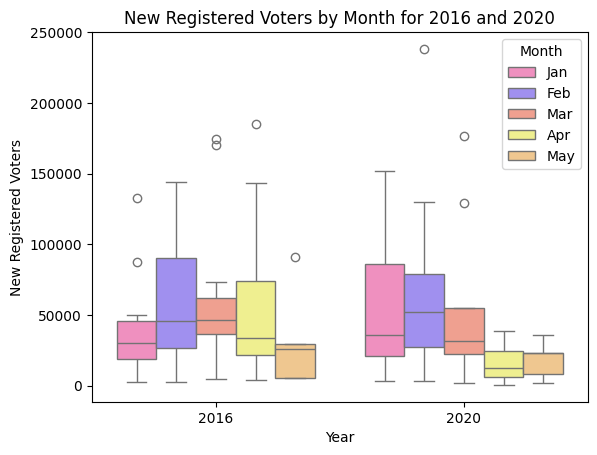

In [ ]:
sns.boxplot(voters, y="registered_voters", x="Year", hue="Month", palette = {"Jan":"#ff80bf", "Feb":"#9580ff", "Mar":"#ff9580", "Apr":"#ffff80", "May":"#ffca80"}, legend = True)
plt.xlabel("Year")
plt.ylabel("New Registered Voters")
plt.title("New Registered Voters by Month for 2016 and 2020")
plt.show()

This line graph answered our state trend question about whether Virginia reseves more registrations in January/February or April/May. On this line graph Virginia is shown as a dark blue line. When following the line displaying Virginia's data we can see that more people registered to vote in January/February and in April/May.

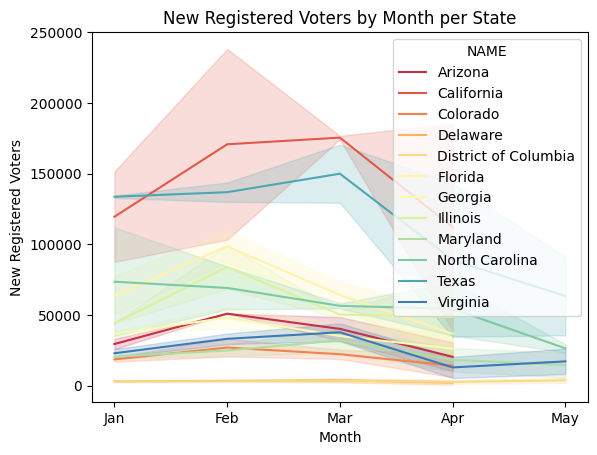

<Figure size 1500x1500 with 0 Axes>

In [ ]:
sns.lineplot(voters,x="Month", y="registered_voters", hue = "NAME", palette= "Spectral" )
plt.xlabel("Month")
plt.ylabel("New Registered Voters")
plt.title("New Registered Voters by Month per State")
plt.figure(figsize=(15,15))
plt.show()

##Mapping

We are going to load our shape files which contain our geometric data and map out the continental states of the US. This map does not include Hawaii and Alaska dude to them not being connected to the mainland.

In [ ]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.50 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

In [ ]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

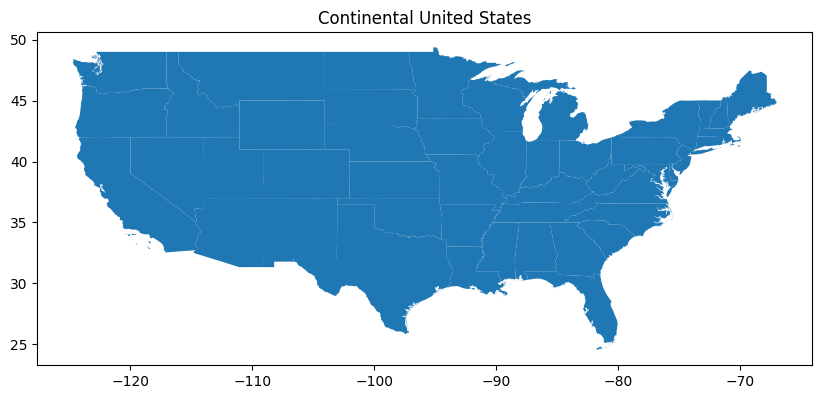

In [ ]:
bbox = states.cx[minx:maxx, miny:maxy]

bbox.plot(figsize=(10, 10))
plt.title("Continental United States")
plt.show()

We are going to create a new dataframe that contains the average number of voters per state. We are creating this to improve our analysis

In [ ]:
average_voters = voters.groupby("NAME")["registered_voters"].mean()

We are going to merge our mapping data and our data about the average number of voters. To do this we are going to merge them using the NAME column since both data sets share this column and they have the same name.

In [ ]:
state_voters = bbox.merge(average_voters, on="NAME", how="inner")

We are going to make a map of the continental US and highlight the states where we have voter registration data. These highlighter states are labeled with their state names and the darker the purple the more registered voters the sate had.

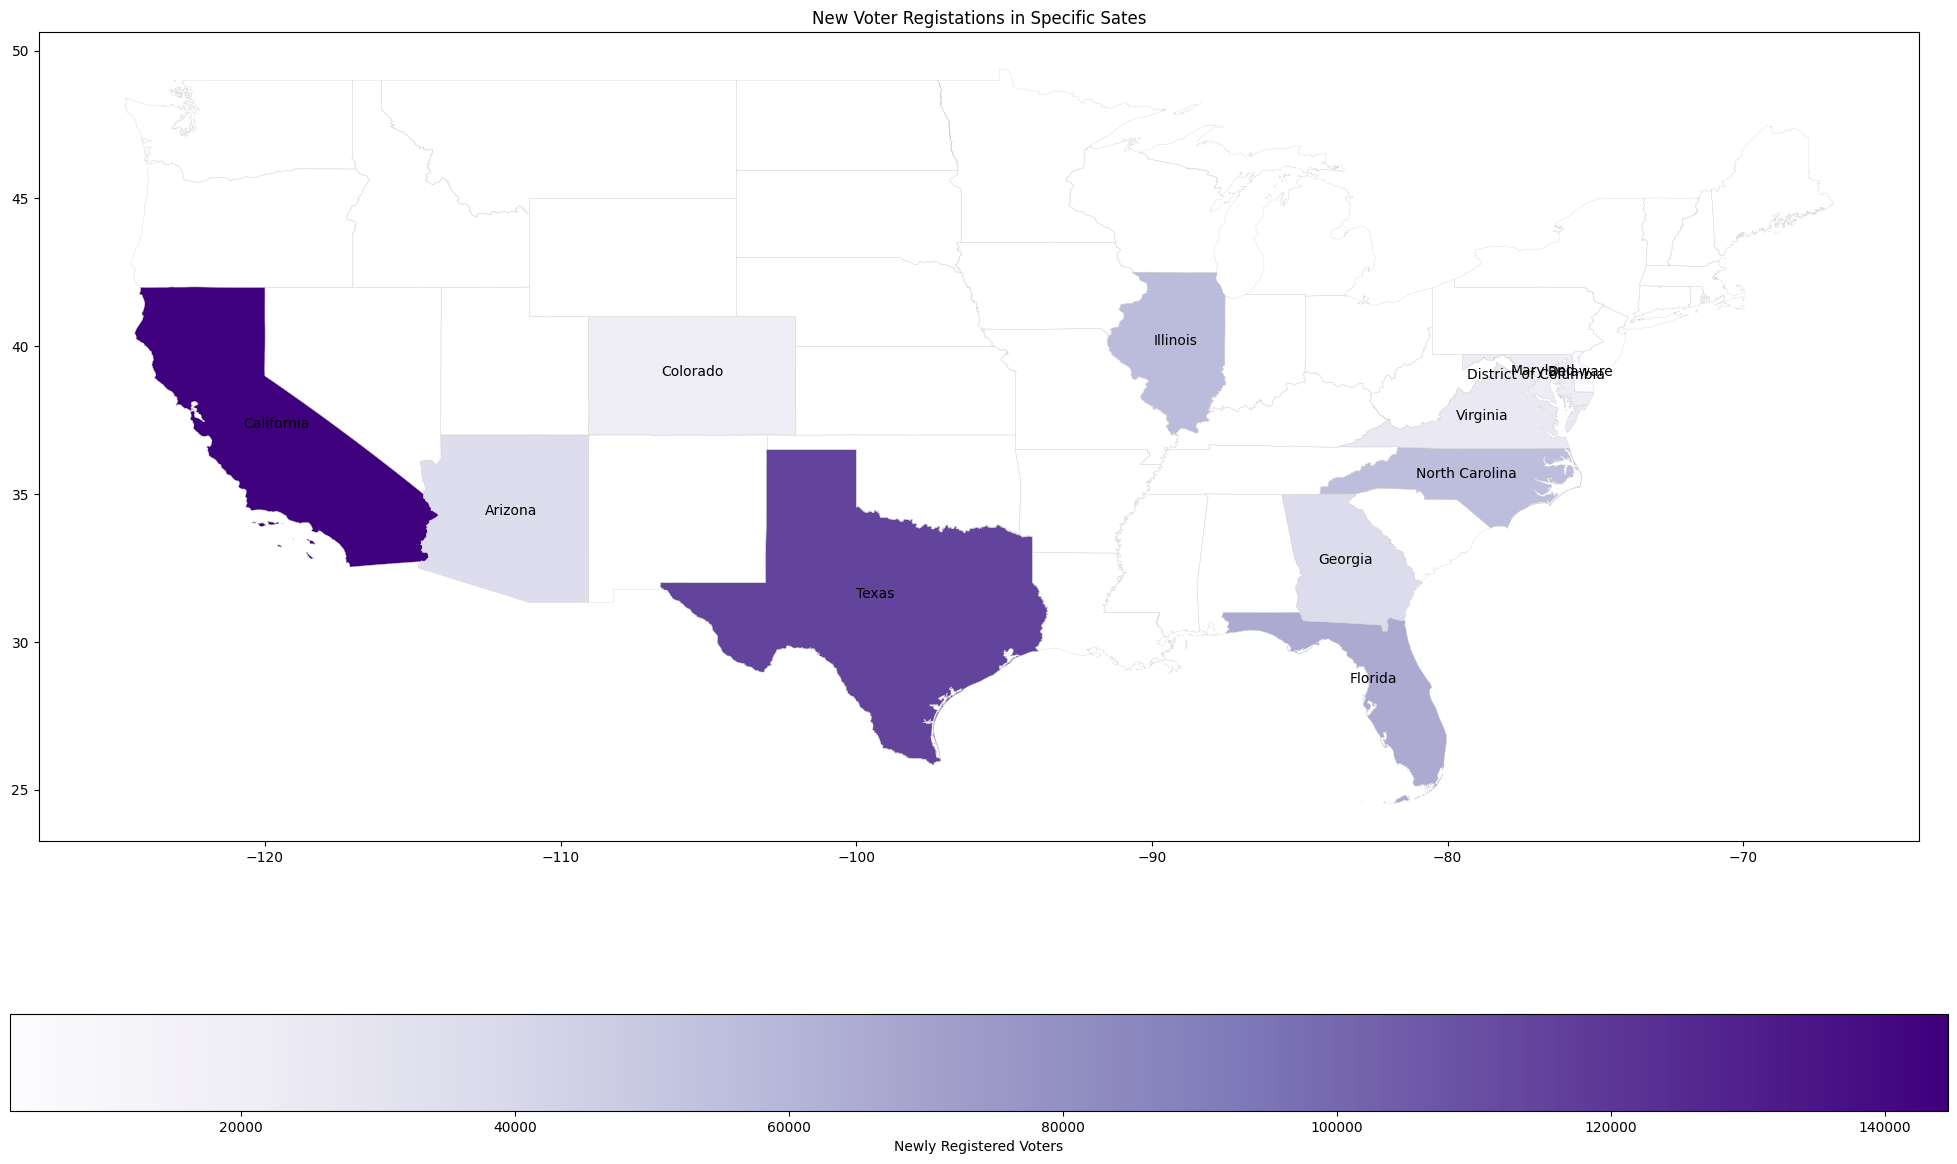

In [ ]:
fig=plt.figure(1, figsize = (25,15))
ax=fig.add_subplot()
bbox.boundary.plot(ax=ax, color = "lightgray", edgecolor = "black", linewidth=.25)
state_voters.plot(column = "registered_voters", ax=ax, legend = True, legend_kwds={"label":"Newly Registered Voters", "orientation":"horizontal"}, cmap = "Purples")
state_voters.apply(lambda x: ax.annotate(text=x.NAME,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="center",fontsize= 10),axis=1)
plt.title("New Voter Registations in Specific Sates")
plt.show()

##Conclusion  


This notebook has allowed us to see California, Texas, and Florida had the highest average and total number of registered voters. We were also able to see that 2016 had more outliers that 2020, meaning that the data was more spread out in 2016. We were also able to see that January of 2020 had saw more new voters register as well that there was more variance between the number of new voter registered.

I would suggest that the client use their resources to try and improve voter registration in places like Colorado and Delaware. These areas had very small amounts of registered voters when compared to other states like California and Texas. Trying to increase the number of people registered to vote is important as it can increase community involvement and help more peoples voices be heard.

If I were to continue working on this project I would want to check the political party of the newly registered voters. This data could be important as it could give candidates and marketing agencies information about where to focus their campaign efforts. It could also be important in estimating which way states will lean in upcoming elections.



##Github

https://github.com/Britt2405/DIDA-325-Midterm.git

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

-Brittany Goldberg